# Supplementary Figure 1
Assuming operation on google colab  

In [2]:
# prepare environment
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# prepare environment
base_dir = "/content/drive/{YOUR PATH}"

import os
os.chdir(base_dir)

check the original batch information

In [4]:
import pandas as pd
import numpy as np
import glob

p_batch = base_dir + "/data/cmap_instances_02_processed.txt"
batch = pd.read_csv(p_batch, index_col=0, sep="\t")

cmap = {'analog':"rep;cell;cmap_name",
        'log':True,
        'index':('ID','Gene symbol'),
        'batch':["batch_id"],
        'sample':'cmap_name',
        'control':['DMSO','medium','etanol']}

batch

,batch_id,cmap_name,concentration (M),duration (h),cell,array,vehicle,rep;cell;cmap_name,rep;cell;cmap_name;array,rep;cell;cmap_name;array;batch_id,rep;cell;cmap_name;array;batch_id;concentration (M)
perturbation_scan_id,,,,,,,,,,,
EC2003090502AA,1,medium,0.000000e+00,6,MCF7,HG-U133A,medium,1125,3155,5255,2264
EC2003090503AA,1,metformin,1.000000e-05,6,MCF7,HG-U133A,medium,2428,1273,3225,2497
EC2003090504AA,1,metformin,1.000000e-05,6,MCF7,HG-U133A,medium,2428,1273,3225,2497
EC2003090505AA,1,metformin,1.000000e-07,6,MCF7,HG-U133A,medium,2428,1273,3225,1368
EC2003090506AA,1,metformin,1.000000e-03,6,MCF7,HG-U133A,medium,2428,1273,3225,1346
...,...,...,...,...,...,...,...,...,...,...,...
5500024053146032309538.H08,1095,trichostatin A,1.000000e-06,6,PC3,HT_HG-U133A,DMSO,14,1342,4715,275
5500024053146032309538.H11,1095,CP-863187,1.000000e-05,6,PC3,HT_HG-U133A,DMSO,3487,3754,422,1349
5500024053146032309538.H09,1095,vinblastine,1.000000e-07,6,PC3,HT_HG-U133A,DMSO,1863,1556,5211,1440


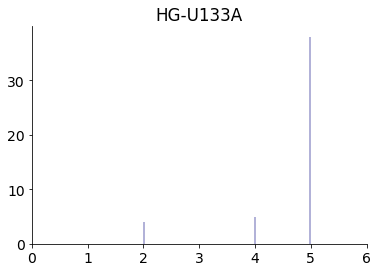

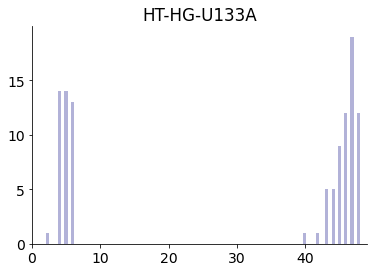

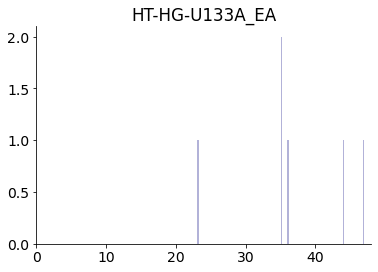

In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

mcf = batch[batch['cell']=='MCF7']

a = mcf[mcf['array']=='HG-U133A']
ta = mcf[mcf['array']=='HT_HG-U133A']
taea = mcf[mcf['array']=='HT_HG-U133A_EA']

name_a = list(a['batch_id'])
name_ta = list(ta['batch_id'])
name_taea = list(taea['batch_id'])

count_a = Counter(name_a)
count_ta = Counter(name_ta)
count_taea = Counter(name_taea)

for c,n in zip([count_a,count_ta,count_taea],['HG-U133A','HT-HG-U133A','HT-HG-U133A_EA']):
    val = list(c.values())
    lim = (0,np.max(val) + 1)
    fig = plt.figure()
    plt.rcParams['font.size'] = 14
    ax = fig.add_subplot(1,1,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.hist(val,color='navy',bins=100,alpha=0.3)
    ax.set_title(n)
    ax.set_xlim(lim)
    plt.show()

In [6]:
comp_ta = set(list(ta['cmap_name']))
con_ta = ta[ta["cmap_name"]=="DMSO"]
ratio_ta = 100 * con_ta.shape[0]/ta.shape[0]

comp_taea = set(list(taea['cmap_name']))
con_taea = taea[taea["cmap_name"]=="DMSO"]
ratio_taea = 100 * con_taea.shape[0]/taea.shape[0]

print("before processing")
print(f"> HT-HG-U133A (Large): ", "#data", ta.shape[0], "/ #compounds", len(comp_ta), "/ % of control", ratio_ta)
print(f"> HT-HG-U133A (Large): ", "#data", taea.shape[0], "/ #compounds", len(comp_taea), "/ % of control", ratio_taea)

before processing
> HT-HG-U133A (Large):  #data 3149 / #compounds 1212 / % of control 12.988250238170847
> HT-HG-U133A (Large):  #data 220 / #compounds 89 / % of control 16.363636363636363


In [7]:
import pandas as pd
from collections import Counter

print("after processing")

# _HT-HG-U133A (Large)
batch = pd.read_csv(base_dir + "/data/batch_HT-HG-U133A_selected.txt",sep='\t',index_col=0)
comp = set(list(batch['cmap_name']))
con = batch[batch["cmap_name"]=="DMSO"]
ratio = 100 * con.shape[0]/batch.shape[0]
print(f"> HT-HG-U133A (Large): ", "#data", batch.shape[0], "/ #compounds", len(comp), "/ % of control", ratio)

# HT-HG-U133A_EA (Small)
batch = pd.read_csv(base_dir + "/data/batch_HT-HG-U133A_EA_selected.txt",sep='\t',index_col=0)
comp = set(list(batch['cmap_name']))
con = batch[batch["cmap_name"]=="DMSO"]
ratio = 100 * con.shape[0]/batch.shape[0]
print(f"> HT-HG-U133A_EA (Small): ", "#data", batch.shape[0], "/ #compounds", len(comp), "/ % of control", ratio)

after processing
> HT-HG-U133A (Large):  #data 2515 / #compounds 1075 / % of control 14.59244532803181
> HT-HG-U133A_EA (Small):  #data 134 / #compounds 50 / % of control 26.865671641791046
